In [1]:
from selenium import webdriver

# 에러가 뜨면 selenium이 설치가 안된 상태이다.
# pip install selenium 으로 설치한다.

<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobi
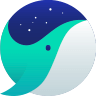
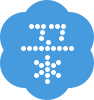

In [2]:
driver = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')

url = 'https://www.naver.com/'
driver.get(url)

html = driver.page_source

print(html)

In [12]:
from bs4 import BeautifulSoup

html = '''
<html>
    <head>
    </head>
    <body>
        <h1>우리동네시장</h1>
            <div class='sale'>
                <p id='fruits1' class='fruits'>
                    <span class='name'>바나나</span>
                    <span class='price'>3000원</span>
                    <span class='inventory'>500개</span>
                    <span class='store'>가나다상회</span>
                    <a href='http://bit.ly/forPlaywithData'>홈페이지</a>
                </p>
            </div>
            <div class='prepare'>
                <p id='fruits2' class='fruits'>
                    <span class='name'>파인애플</span>
                </p>
            </div>
     </body>
</html>     
'''

soup = BeautifulSoup(html, 'html.parser')

In [13]:
tags_span = soup.select('span')
tags_p = soup.select('p')

In [14]:
ids_fruits1 = soup.select('#fruits1')
class_price = soup.select('.price')
tags_span_class_price = soup.select('span.price')

In [15]:
tags_name = soup.select('span.name')

print(tags_name)

[<span class="name">바나나</span>, <span class="name">파인애플</span>]


In [16]:
tags_banana1 = soup.select('#fruits1 > span.name')
print(tags_banana1)

[<span class="name">바나나</span>]


In [17]:
tags_banana2 = soup.select('div.sale > #fruits1 > span.name')
tags_banana3 = soup.select('div.sale span.name')

print(tags_banana2)
print(tags_banana3)

[<span class="name">바나나</span>]
[<span class="name">바나나</span>]


In [18]:
tags = soup.select('span.name')

for tag in tags:
    print(tag)

<span class="name">바나나</span>
<span class="name">파인애플</span>


In [20]:
tags = soup.select('a')
tag = tags[0]
content = tag.text
print(content)

link = tag['href']
print(link)

홈페이지
http://bit.ly/forPlaywithData


In [30]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')

url = 'https://www.melon.com/chart/index.htm'

driver.get(url)

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

songs = soup.select('table > tbody > tr')

print(len(songs))
print(songs[0])

100
<tr data-song-no="33077590">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="VVS (Feat. JUSTHIS) (Prod. GroovyRoom) 곡 선택" type="checkbox" value="33077590"/></div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10521601');" title="쇼미더머니 9 Episode 1">
<img alt="쇼미더머니 9 Episode 1 - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/105/21/601/10521601_20201120125511_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('33077590');" title="VVS (Feat. JUSTHIS) (Prod. GroovyRoom) 곡정보"><span class="none">곡정보</span></a>
</div></td>
<td><div class="wrap">
<div class="wrap_song_info">
<div class="ellipsis rank01"><span>
<a href="javascript:melon.play.playSong('19030101',33077590);" t

In [32]:
song = songs[0]

title = song.select('a')
len(title)

16

In [33]:
title = song.select('span > a')
len(title)

5

In [34]:
title = song.select('div.ellipsis.rank01 > span > a')
len(title)

1

In [35]:
title = song.select('div.ellipsis.rank01 > span > a')[0].text
title

'VVS (Feat. JUSTHIS) (Prod. GroovyRoom)'

In [36]:
singer = song.select('div.ellipsis.rank02 > a')
len(singer)

4

In [37]:
singer = song.select('div.ellipsis.rank02 > a')[0].text
singer

'미란이 (Mirani)'

In [38]:
# 멜론 100위 노래순위 정보 가져오기
for song in songs:
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('div.ellipsis.rank02 > a')[0].text
    print(title, singer, sep = '|')

VVS (Feat. JUSTHIS) (Prod. GroovyRoom)|미란이 (Mirani)
내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))|릴보이 (lIlBOI)
Dynamite|방탄소년단
잠이 오질 않네요|장범준
힘든 건 사랑이 아니다|임창정
Achoo (Feat. pH-1, HAON) (Prod. GroovyRoom)|미란이 (Mirani)
밤하늘의 별을(2020)|경서
Life Goes On|방탄소년단
Lovesick Girls|BLACKPINK
취기를 빌려 (취향저격 그녀 X 산들)|산들
Freak (Prod. Slom)|릴보이 (lIlBOI)
뿌리 (Feat. JUSTHIS) (Prod. GroovyRoom)|Khundi Panda
오래된 노래|스탠딩 에그
Savage Love (Laxed - Siren Beat) (BTS Remix)|Jawsh 685
All I Want For Christmas Is You|Mariah Carey
내 마음이 움찔했던 순간 (취향저격 그녀 X 규현)|규현 (KYUHYUN)
DON'T TOUCH ME|환불원정대
딩가딩가 (Dingga)|마마무 (Mamamoo)
When We Disco (Duet with 선미)|박진영
적외선 카메라|원슈타인
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지|AKMU (악동뮤지션)
어김없이 이 거리에|정승환
나랑 같이 걸을래 (바른연애 길잡이 X 적재)|적재
에잇(Prod.&Feat. SUGA of BTS)|아이유
흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야|장범준
뻔한남자|이승기
Santa Tell Me|Ariana Grande
How You Like That|BLACKPINK
I CAN’T STOP ME|TWICE (트와이스)
어떻게 지내 (Prod. By VAN.C)|오반
늦은 밤 너의 집 앞 골목길에서|노을
혼술하고 싶은 밤|벤
원해 (Feat. 팔로알토) (Prod. 코드 쿤스트)|스윙스
Dolphin|오마이걸 (OH MY GIRL)
가을밤에 든 생각|잔나비


In [39]:
driver = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')
url = 'https://www.melon.com/chart/index.htm'
driver.get(url)

songs = driver.find_elements_by_css_selector('table > tbody > tr')
for song in songs:
    title = song.find_elements_by_css_selector('div.ellipsis.rank01 > span > a')[0].text
    singer = song.find_elements_by_css_selector('div.ellipsis.rank02 > a')[0].text
    print(title, singer, sep = '|')

VVS (Feat. JUSTHIS) (Prod. GroovyRoom)|미란이 (Mirani)
내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))|릴보이 (lIlBOI)
Dynamite|방탄소년단
잠이 오질 않네요|장범준
힘든 건 사랑이 아니다|임창정
Achoo (Feat. pH-1, HAON) (Prod. GroovyRoom)|미란이 (Mirani)
밤하늘의 별을(2020)|경서
Life Goes On|방탄소년단
Lovesick Girls|BLACKPINK
취기를 빌려 (취향저격 그녀 X 산들)|산들
Freak (Prod. Slom)|릴보이 (lIlBOI)
뿌리 (Feat. JUSTHIS) (Prod. GroovyRoom)|Khundi Panda
오래된 노래|스탠딩 에그
Savage Love (Laxed - Siren Beat) (BTS Remix)|Jawsh 685
All I Want For Christmas Is You|Mariah Carey
내 마음이 움찔했던 순간 (취향저격 그녀 X 규현)|규현 (KYUHYUN)
DON'T TOUCH ME|환불원정대
딩가딩가 (Dingga)|마마무 (Mamamoo)
When We Disco (Duet with 선미)|박진영
적외선 카메라|원슈타인
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지|AKMU (악동뮤지션)
어김없이 이 거리에|정승환
나랑 같이 걸을래 (바른연애 길잡이 X 적재)|적재
에잇(Prod.&Feat. SUGA of BTS)|아이유
흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야|장범준
뻔한남자|이승기
Santa Tell Me|Ariana Grande
How You Like That|BLACKPINK
I CAN’T STOP ME|TWICE (트와이스)
어떻게 지내 (Prod. By VAN.C)|오반
늦은 밤 너의 집 앞 골목길에서|노을
혼술하고 싶은 밤|벤
원해 (Feat. 팔로알토) (Prod. 코드 쿤스트)|스윙스
Dolphin|오마이걸 (OH MY GIRL)
가을밤에 든 생각|잔나비


In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')
url = 'https://www.melon.com/chart/index.htm'

driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [6]:
song_data = []
rank = 1
songs = soup.select('table > tbody > tr')

for song in songs:
    title = song.select('div.rank01 > span > a')[0].text
    singer = song.select('div.rank02 > a')[0].text
    song_data.append(['Melon', rank, title, singer])
    rank = rank + 1
    
print(song_data)    

[['Melon', 1, 'VVS (Feat. JUSTHIS) (Prod. GroovyRoom)', '미란이 (Mirani)'], ['Melon', 2, '내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))', '릴보이 (lIlBOI)'], ['Melon', 3, 'Dynamite', '방탄소년단'], ['Melon', 4, '잠이 오질 않네요', '장범준'], ['Melon', 5, '힘든 건 사랑이 아니다', '임창정'], ['Melon', 6, 'Achoo (Feat. pH-1, HAON) (Prod. GroovyRoom)', '미란이 (Mirani)'], ['Melon', 7, '밤하늘의 별을(2020)', '경서'], ['Melon', 8, 'Life Goes On', '방탄소년단'], ['Melon', 9, 'Lovesick Girls', 'BLACKPINK'], ['Melon', 10, '취기를 빌려 (취향저격 그녀 X 산들)', '산들'], ['Melon', 11, 'Freak (Prod. Slom)', '릴보이 (lIlBOI)'], ['Melon', 12, '뿌리 (Feat. JUSTHIS) (Prod. GroovyRoom)', 'Khundi Panda'], ['Melon', 13, '오래된 노래', '스탠딩 에그'], ['Melon', 14, 'Savage Love (Laxed - Siren Beat) (BTS Remix)', 'Jawsh 685'], ['Melon', 15, 'All I Want For Christmas Is You', 'Mariah Carey'], ['Melon', 16, '내 마음이 움찔했던 순간 (취향저격 그녀 X 규현)', '규현 (KYUHYUN)'], ['Melon', 17, "DON'T TOUCH ME", '환불원정대'], ['Melon', 18, '딩가딩가 (Dingga)', '마마무 (Mamamoo)'], ['Melon', 19, 'When We Disco (Duet with 선미)', '박진

In [7]:
import pandas as pd

columns = ['서비스', '순위', '타이틀', '가수']
pd_data = pd.DataFrame(song_data, columns = columns)
pd_data.head()

,서비스,순위,타이틀,가수
0,Melon,1,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),미란이 (Mirani)
1,Melon,2,"내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))",릴보이 (lIlBOI)
2,Melon,3,Dynamite,방탄소년단
3,Melon,4,잠이 오질 않네요,장범준
4,Melon,5,힘든 건 사랑이 아니다,임창정


In [10]:
# 데이터 -> 엑셀로 변환

pd_data.to_excel('./file/melon.xlsx', index=False)

In [60]:
# 벅스 크롤링

from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')
url = 'https://music.bugs.co.kr/chart'
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')



In [61]:
songs = soup.select('tr')
print(len(songs))

songs = soup.select('tbody > tr')
print(len(song))

songs = soup.select('table.byChart > tbody > tr')
print(len(songs))

104
31
100


In [62]:
print(songs[0])

<tr albumid="4017860" artistid="80213200" multiartist="N" mvid="581423" rowtype="track" trackid="6030580">
<input name="_isStream" type="hidden" value="6030580"/>
<input name="_isDown" type="hidden" value="6030580"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="어김없이 이 거리에" type="checkbox" value="6030580"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change none"><em>0</em><span>변동없음</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/4017860?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="어김없이 이 거리에 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/40178/4017860.jpg?version=20201209183509.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/6030580?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bu

In [63]:
song = songs[0]

title = song.select('a')
print(len(title))

title = song.select('p > a')
print(len(title))

title = song.select('p.title > a')
print(len(title))

title = song.select('p.title > a')[0].text
print(title)

singer = song.select('p.artist > a')[0].text.strip()
print(singer)

11
2
1
어김없이 이 거리에
정승환


In [64]:
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    print(title, singer, sep = '|')

어김없이 이 거리에|정승환
Achoo (Feat. pH-1, HAON) (Prod. GroovyRoom)|미란이
VVS (Feat. JUSTHIS) (Prod. GroovyRoom)|미란이
내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))|릴보이(lIlBOI)
Panorama|IZ*ONE(아이즈원)
Life Goes On|방탄소년단
뿌리 (Feat. JUSTHIS) (Prod. GroovyRoom)|KHUNDI PANDA
적외선 카메라|원슈타인
Dynamite|방탄소년단
Black Mamba|aespa
밤하늘의 별을(2020)|경서
잠이 오질 않네요|장범준
지우고 아플 사랑은..|김종국
Lovesick Girls|BLACKPINK
Santa Tell Me|Ariana Grande(아리아나 그란데)
혼술하고 싶은 밤|벤
사라진 모든 것들에게(with ELLE KOREA)|코드 쿤스트
한 번에 알아본 사랑 (바른연애 길잡이 X 양요섭)|양요섭
가을밤에 든 생각|잔나비
Better|보아 (BoA)
MAGO|여자친구(GFRIEND)
All I Want for Christmas Is You|Mariah Carey(머라이어 캐리)
I CAN’T STOP ME|TWICE (트와이스)
나랑 같이 걸을래 (바른연애 길잡이 X 적재)|적재
취기를 빌려 (취향저격 그녀 X 산들)|산들
힘든 건 사랑이 아니다|임창정
Freak (Prod. Slom)|릴보이(lIlBOI)
딩가딩가 (Dingga)|마마무(Mamamoo)
엉뚱한 상상|코요태
Snowman|Sia(시아)
언젠가 설명이 필요한 밤 (바니와 오빠들 X 승희 (오마이걸))|승희 (오마이걸)
부어라 비워라 (Tricker) (Prod. GroovyRoom)|머쉬베놈(MUSHVENOM)
Savage Love (Laxed - Siren Beat) (BTS Remix)|Jawsh 685
HAPPENING|AKMU (악동뮤지션)
내 방을 여행하는 법|방탄소년단
SO BAD|STAYC(스테이씨)
너도 아는|폴킴(Pa

In [75]:
# 벅스 크롤링

from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')
url = 'https://music.bugs.co.kr/chart'
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

song_data = []
rank = 1
songs = soup.select('table.byChart > tbody > tr')

for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    song_data.append(['Bugs', rank, title, singer])
    rank = rank + 1
    
import pandas as pd

columns = ['서비스', '순위', '타이틀', '가수']
pd_data = pd.DataFrame(song_data, columns = columns)
pd_data.to_excel('./file/bugs.xlsx', index = False)

In [10]:
# 지니 크롤링

from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

driver = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')
url = 'https://www.genie.co.kr/chart/top200'

driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

songs = soup.select('table > tbody > tr')
# print(len(songs))
# print(songs[0])

song = songs[0]

title = song.select('a.title')
# len(title)

title = song.select('a.title')[0].text

title = song.select('a.title')[0].text.strip()
print(title)

singer = song.select('a.artist')
# print(len(singer))

singer = song.select('a.artist')[0].text
# print(singer)

songs = soup.select('tbody > tr')

for song in songs:
    title = song.select('a.title')[0].text.strip()
    singer = song.select('a.artist')[0].text
#    print(title, singer, sep = '|')
    
song_data = []
rank = 1
songs = soup.select('tbody > tr')

for song in songs:
    title = song.select('a.title')[0].text.strip()
    singer = song.select('a.artist')[0].text
    song_data.append(['Genie', rank, title, singer])
    rank = rank + 1
    
print(song_data)    

columns = ['서비스', '순위', '타이틀', '가수']
pd_data = pd.DataFrame(song_data, columns = columns)
pd_data.to_excel('./file/genie.xlsx', index = False)

악역 (Feat. 이하이 & 사이먼 도미닉) (Prod. by 코드 쿤스트)
[['Genie', 1, '악역 (Feat. 이하이 & 사이먼 도미닉) (Prod. by 코드 쿤스트)', '스윙스 (Swings)'], ['Genie', 2, 'VVS (Feat. JUSTHIS) (Prod. by GroovyRoom)', '미란이 (Mirani) & 먼치맨 & Khundi Panda & 머쉬베놈 (MUSHVENOM)'], ['Genie', 3, 'Dynamite', '방탄소년단'], ['Genie', 4, 'Life Goes On', '방탄소년단'], ['Genie', 5, 'Hate you', '백예린 (Yerin Baek)'], ['Genie', 6, '고독하구만 (Feat. 수퍼비) (Prod. by GroovyRoom)', '머쉬베놈 (MUSHVENOM)'], ['Genie', 7, '내일이 오면 (Feat. 기리보이 & BIG Naughty (서동현))', '릴보이 (lIlBOI)'], ['Genie', 8, '밤하늘의 별을 (2020)', '경서'], ['Genie', 9, '이제 나만 믿어요', '임영웅'], ['Genie', 10, 'All I Want for Christmas Is You', 'Mariah Carey'], ['Genie', 11, 'Achoo (Feat. pH-1 & HAON) (Prod. by GroovyRoom)', '미란이 (Mirani)'], ['Genie', 12, '혼술하고 싶은 밤', '벤'], ['Genie', 13, 'Santa Tell Me', 'Ariana Grande'], ['Genie', 14, 'Savage Love (Laxed - Siren Beat) (BTS Remix)', 'Jawsh 685 & Jason Derulo & 방탄소년단'], ['Genie', 15, '잠이 오질 않네요', '장범준'], ['Genie', 16, '뿌리 (Feat. JUSTHIS) (Prod. by GroovyRoom)', '

In [12]:
# 멜론, 벅스, 지니 크롤링 엑셀 파일 통합하기

import pandas as pd

excel_names = ['./file/melon.xlsx', './file/bugs.xlsx', './file/genie.xlsx']

appended_data = pd.DataFrame()
for name in excel_names:
    pd_data = pd.read_excel(name)
    appended_data = appended_data.append(pd_data)
    
appended_data.info()    

appended_data.to_excel('./file/total.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     250 non-null    object
 1   순위      250 non-null    int64 
 2   타이틀     250 non-null    object
 3   가수      250 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [30]:
# 유튜브 랭킹 데이터 수집하기

from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

browser = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

channel_list = soup.select('tr')
# print(len(channel_list), '\n')
# print(channel_list[0])

channel_list = soup.select('form > table > tbody > tr')
# print(len(channel_list))

channel = channel_list[0]
# print(channel)

category = channel.select('p.category')[0].text.strip()
# print(category)

title = channel.select('h1 > a')[0].text.strip()
# print(title)

subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

# print(subscriber)
# print(view)
# print(video)

# channel_list = soup.select('tbody > tr')
# rank = 0

# for channel in channel_list:
#    title = channel.select('h1 > a')[0].text.strip()
#    category = channel.select('p.category')[0].text.strip()
#    subscriber = channel.select('.subscriber_cnt')[0].text
#    view = channel.select('.view_cnt')[0].text
#    video = channel.select('.video_cnt')[0].text
#    print(title, category, subscriber, view, video)
    
    # 목록 사이의 광고 때문에 에러가 걸려 100개만 추출한다.
#    rank = rank + 1
#    if rank == 100:
#        break
        

page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)

result = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    rank = 0
    
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        result.append(data)
#        print(title, category, subscriber, view, video)

        # 목록 사이의 광고 때문에 에러가 걸려 100개만 추출한다.
        rank = rank + 1
        if rank == 100:
            break

print(result)

df = pd.DataFrame(result)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./file/youtube_rank.xlsx', index = False)

[['BLACKPINK', '[음악/댄스/가수]', '5440만', '140억0236만', '329개'], ['Big Hit Labels', '[음악/댄스/가수]', '4910만', '134억4755만', '481개'], ['BANGTANTV', '[음악/댄스/가수]', '4200만', '61억1184만', '1,371개'], ['Boram Tube Vlog [보람튜브 브이로그]', '[키즈/어린이]', '2650만', '110억5288만', '223개'], ['SMTOWN', '[음악/댄스/가수]', '2540만', '189억1718만', '3,614개'], ['1MILLION Dance Studio', '[음악/댄스/가수]', '2280만', '59억6732만', '2,319개'], ['1theK (원더케이)', '[음악/댄스/가수]', '2150만', '183억2031만', '13,592개'], ['JYP Entertainment', '[음악/댄스/가수]', '1950만', '113억1390만', '1,213개'], ["America's Got Talent", '[미분류]', '1840만', '37억7750만', '2,428개'], ['ArianaGrandeVevo', '[음악/댄스/가수]', '1820만', '154억3790만', '128개'], ['Mnet K-POP', '[음악/댄스/가수]', '1660만', '108억0098만', '22,409개'], ['JFlaMusic', '[음악/댄스/가수]', '1660만', '31억5175만', '271개'], ['KBS World', '[TV/방송]', '1480만', '106억3723만', '47,982개'], ['officialpsy', '[음악/댄스/가수]', '1440만', '80억7648만', '90개'], ['Boram Tube ToysReview [보람튜브 토이리뷰]', '[키즈/어린이]', '1390만', '46억1623만', '402개'], ['BIGBANG', '[음악/댄스/가수]', 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')
    
df = pd.read_excel('./file/youtube_rank.xlsx')
df.head()



,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],5440만,140억0236만,329개
1,Big Hit Labels,[음악/댄스/가수],4910만,134억4755만,481개
2,BANGTANTV,[음악/댄스/가수],4200만,61억1184만,"1,371개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
4,SMTOWN,[음악/댄스/가수],2540만,189억1718만,"3,614개"


In [2]:
df.tail()

,title,category,subscriber,view,video
995,급식걸즈,[취미/라이프],40만,2억3901만,226개
996,OCN,[TV/방송],40만,3억4583만,"10,071개"
997,Bravo jamoasi,[미분류],40만,6193만,25개
998,덕출 : DCTVGO,[TV/방송],40만,8249만,202개
999,San E,[TV/방송],40만,2496만,268개


In [4]:
df['subscriber'][0:10]

0    5440만
1    4910만
2    4200만
3    2650만
4    2540만
5    2280만
6    2150만
7    1950만
8    1840만
9    1820만
Name: subscriber, dtype: object

In [5]:
df['subscriber'].str.replace('만', '0000')[0:10]

0    54400000
1    49100000
2    42000000
3    26500000
4    25400000
5    22800000
6    21500000
7    19500000
8    18400000
9    18200000
Name: subscriber, dtype: object

In [6]:
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],5440만,140억0236만,329개,54400000
1,Big Hit Labels,[음악/댄스/가수],4910만,134억4755만,481개,49100000
2,BANGTANTV,[음악/댄스/가수],4200만,61억1184만,"1,371개",42000000
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000
4,SMTOWN,[음악/댄스/가수],2540만,189억1718만,"3,614개",25400000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [8]:
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [9]:
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum', 'count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],86660000,68
[IT/기술/컴퓨터],6450000,8
[TV/방송],197980000,162
[게임],75100000,101
[교육/강의],19580000,23


In [10]:
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],86660000,68
[IT/기술/컴퓨터],6450000,8
[TV/방송],197980000,162
[게임],75100000,101
[교육/강의],19580000,23


In [11]:
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],86660000,68
1,[IT/기술/컴퓨터],6450000,8
2,[TV/방송],197980000,162
3,[게임],75100000,101
4,[교육/강의],19580000,23


In [12]:
pivot_df = pivot_df.sort_values(by = 'subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],576060000,175
17,[키즈/어린이],263470000,94
2,[TV/방송],197980000,162
11,[음식/요리/레시피],143720000,88
0,[BJ/인물/연예인],86660000,68


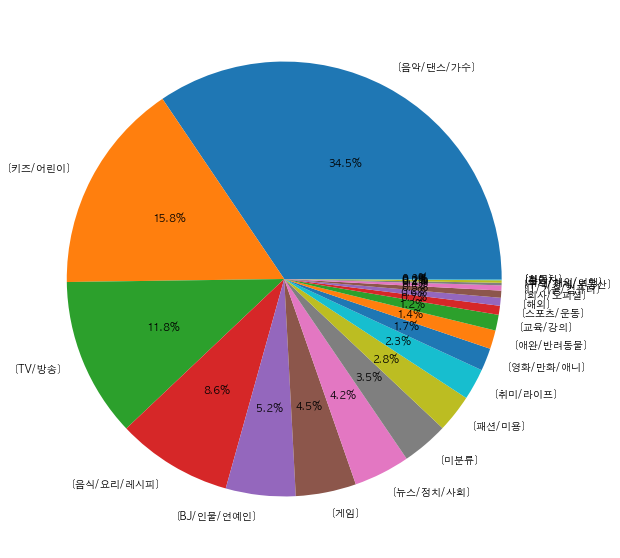

In [13]:
plt.figure(figsize = (30, 10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct="%1.1f%%")
plt.show()

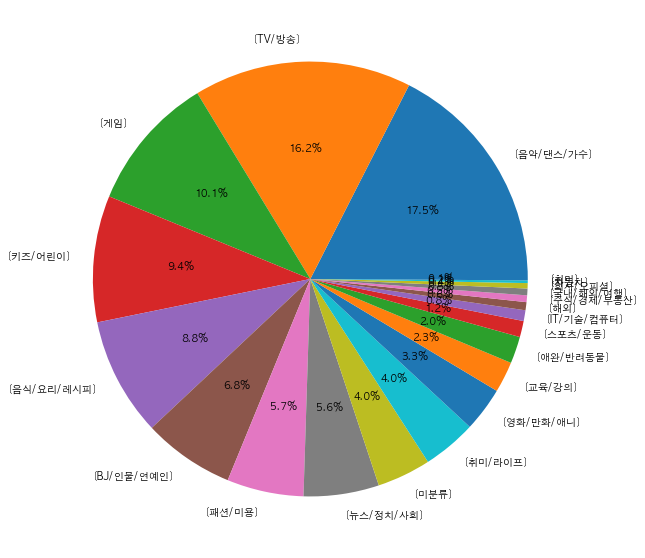

In [15]:
pivot_df = pivot_df.sort_values(by = 'category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30, 10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()